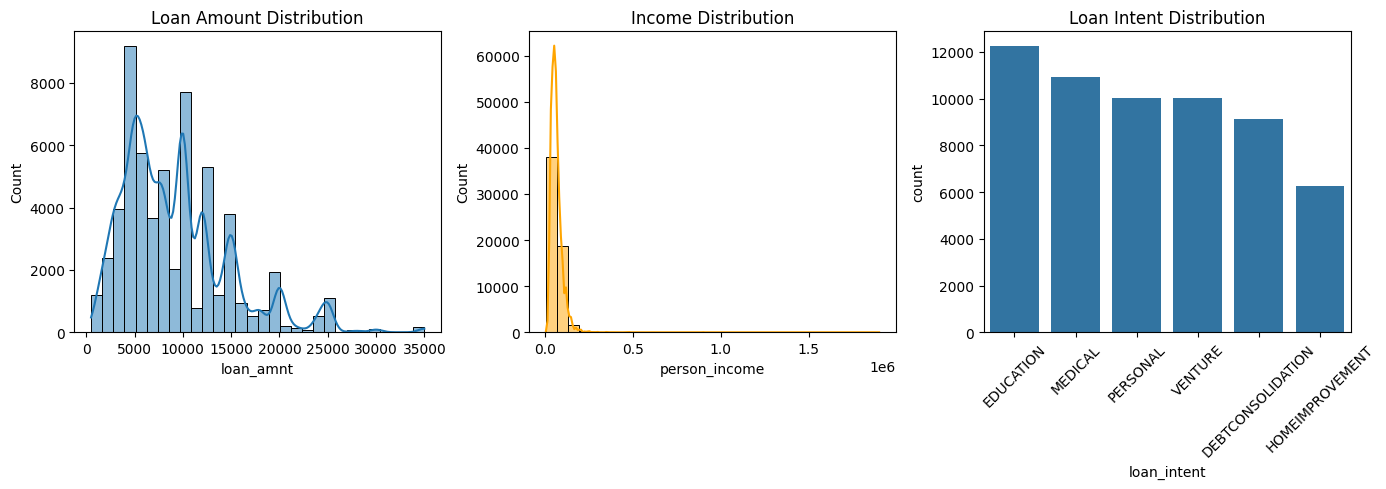

Accuracy: 0.91


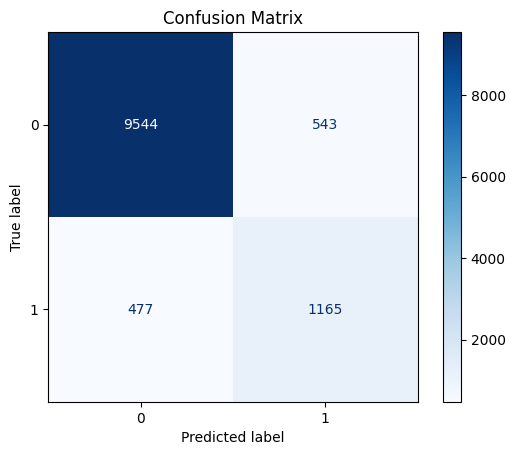

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("Loan.csv")

# Step 1: Handle missing values
df = df.dropna()  # You can also use imputation if preferred

# Step 2: Visualize key features
plt.figure(figsize=(14, 5))

# Loan Amount Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title("Loan Amount Distribution")

# Income Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['person_income'], bins=30, kde=True, color='orange')
plt.title("Income Distribution")

# Loan Intent (like Education, Medical etc.)
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='loan_intent', order=df['loan_intent'].value_counts().index)
plt.title("Loan Intent Distribution")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Step 3: Encode categorical features
label_encoders = {}
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 4: Split data into features and target
X = df.drop(columns=['id', 'loan_status'])
y = df['loan_status']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict and Evaluate
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
